In [13]:
import projection
import numpy as np
import plot
import utils
import importlib
import os
import read_chroma
import numpy as np
import math
import baseline_correction
import mass_spec
import discriminant_pixel

In [2]:
FOLD_PATH = 'F:/Bureau/032023-data-Tenax-VOC-COVID/'

In [3]:
mod_time = 1.25

In [17]:
labels = ['positif faible', 'positif', 'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'positif faible', 'positif faible', 'negatif']
labels = np.array(labels)

In [5]:
files = os.listdir(FOLD_PATH)[:10]
files

['801850-A-C-01-157-split10.cdf',
 '802111-P-M-01-158-split10.cdf',
 '802115-A-Y-01-152-split10.cdf',
 '802116-S-S-01-154-split10.cdf',
 '802118-P-W-01-149-split10.cdf',
 '817811-B-F-01-156-split10.cdf',
 '817815-A-A-01-151-split10.cdf',
 '817824-C-A-01-150-split10.cdf',
 '817837-C-H-01-155-split10.cdf',
 '817840-D-I-01-153-split10.cdf']

In [10]:
chromato_ref_obj = read_chroma.read_chroma(FOLD_PATH + files[0], mod_time)

In [11]:
chromato, time_rn, spectra_obj = chromato_ref_obj
full_spectra = mass_spec.read_full_spectra_centroid(spectra_obj=spectra_obj)
spectra, debuts, fins = full_spectra

--- 338.4348568916321 seconds --- to compute full spectra centroid


In [12]:
chromato_cube = read_chroma.full_spectra_to_chromato_cube(full_spectra=full_spectra, spectra_obj=spectra_obj)
chromato_cube = np.array(baseline_correction.chromato_cube_corrected_baseline(chromato_cube))

In [14]:
chromato_objs = []
for file in files:
    chromato_obj_tmp = read_chroma.read_only_chroma(FOLD_PATH + file, mod_time)
    chromato_objs.append(chromato_obj_tmp)


In [15]:
chromatos = np.array([baseline_correction.chromato_no_baseline(chromato) for chromato,time_rn in chromato_objs])

# Positif vs (Positif Faible vs Neg)

In [18]:
vij_posi_vs_other = np.ones(labels.shape)
vij_posi_vs_other[labels != 'positif'] = -1
vij_posi_vs_other

array([-1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.])

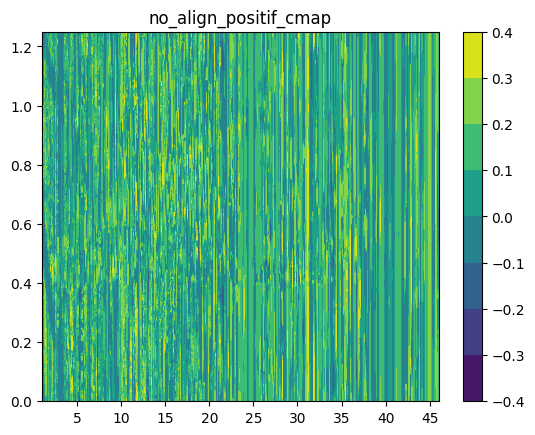

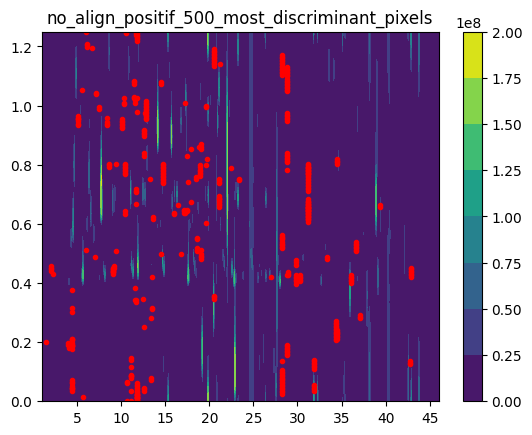

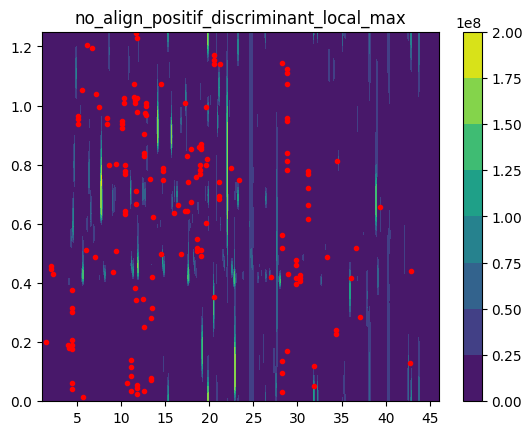

c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �-(4-Methyl-4-hydroxypiperidino)propiophenone: [-31].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �-Hydroxyethyl phenyl ether: [-31].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �-Phenoxyethyl alcohol: [-31].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-pack

nb peaks:
161


c:\Users\Stan\pic\plot.py:145: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')
c:\Users\Stan\pic\plot.py:145: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')


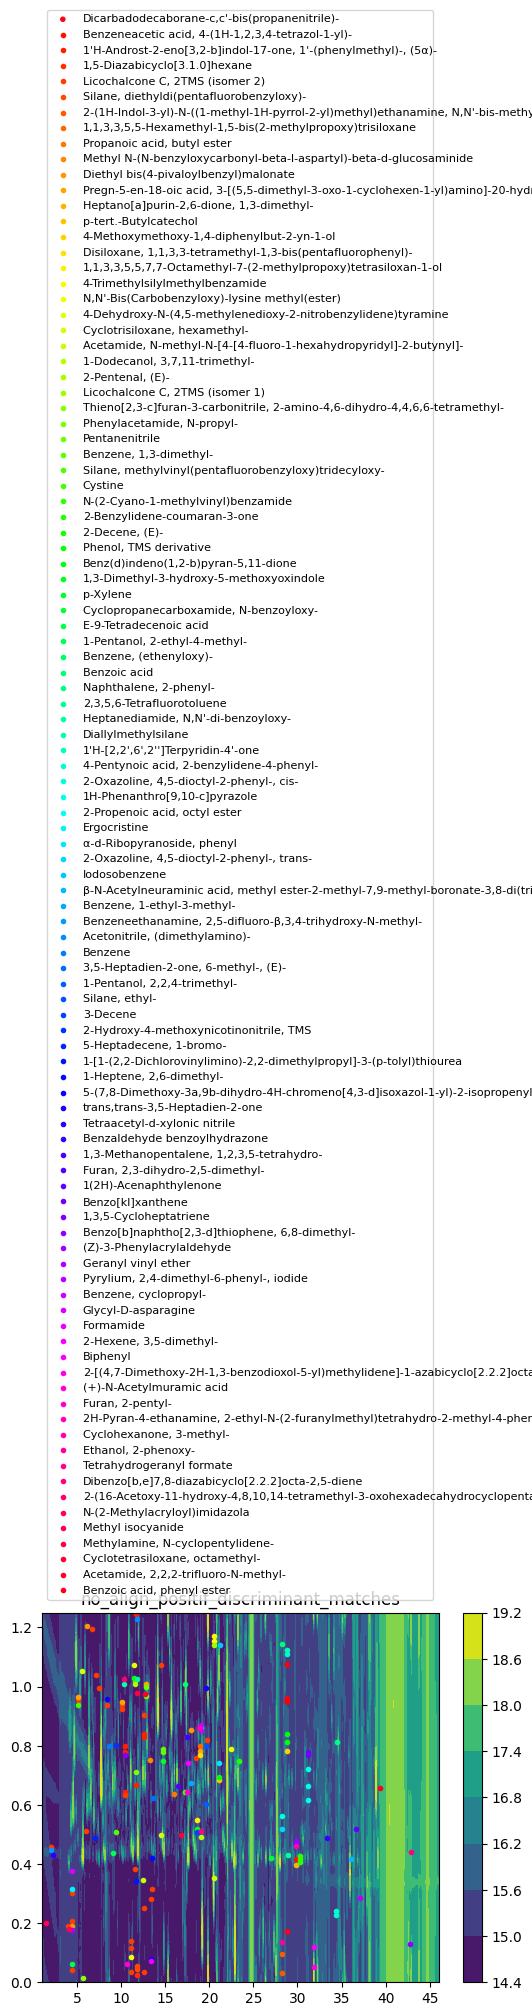

In [19]:
matches = discriminant_pixel.find_discriminant_compounds(chromato_ref_obj, chromatos, chromato_cube, vij_posi_vs_other, disp=True, max_pixel=500, local_max_filter=True, mod_time=1.25, title="no_align_positif_")

In [20]:
for match in matches[:20]:
    print(match[1]["compound_name"])

Dicarbadodecaborane-c,c'-bis(propanenitrile)-
Benzeneacetic acid, 4-(1H-1,2,3,4-tetrazol-1-yl)-
1'H-Androst-2-eno[3,2-b]indol-17-one, 1'-(phenylmethyl)-, (5α)-
1,5-Diazabicyclo[3.1.0]hexane
Dicarbadodecaborane-c,c'-bis(propanenitrile)-
Licochalcone C, 2TMS (isomer 2)
Silane, diethyldi(pentafluorobenzyloxy)-
2-(1H-Indol-3-yl)-N-((1-methyl-1H-pyrrol-2-yl)methyl)ethanamine, N,N'-bis-methyl
1,1,3,3,5,5-Hexamethyl-1,5-bis(2-methylpropoxy)trisiloxane
Propanoic acid, butyl ester
Methyl N-(N-benzyloxycarbonyl-beta-l-aspartyl)-beta-d-glucosaminide
Diethyl bis(4-pivaloylbenzyl)malonate
Pregn-5-en-18-oic acid, 3-[(5,5-dimethyl-3-oxo-1-cyclohexen-1-yl)amino]-20-hydroxy-, γ-lactone, (3α,20R)-
Heptano[a]purin-2,6-dione, 1,3-dimethyl-
p-tert.-Butylcatechol
4-Methoxymethoxy-1,4-diphenylbut-2-yn-1-ol
Disiloxane, 1,1,3,3-tetramethyl-1,3-bis(pentafluorophenyl)-
1,1,3,3,5,5,7,7-Octamethyl-7-(2-methylpropoxy)tetrasiloxan-1-ol
4-Trimethylsilylmethylbenzamide
N,N'-Bis(Carbobenzyloxy)-lysine methyl(ester)


# Positif + Positif Faible vs Neg

In [21]:
vij_posi_plus_posi_f_vs_other = np.ones(labels.shape)
vij_posi_plus_posi_f_vs_other[labels == 'negatif'] = -1
vij_posi_plus_posi_f_vs_other = -1 * vij_posi_vs_other

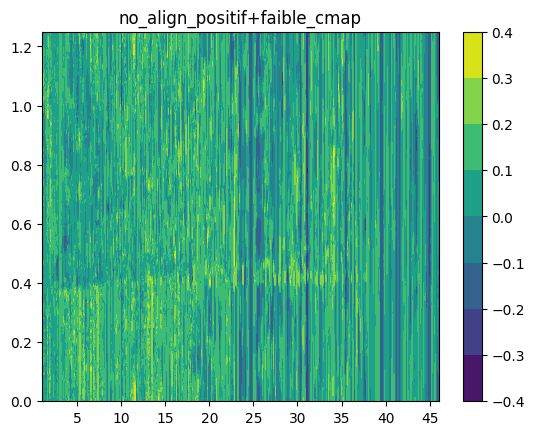

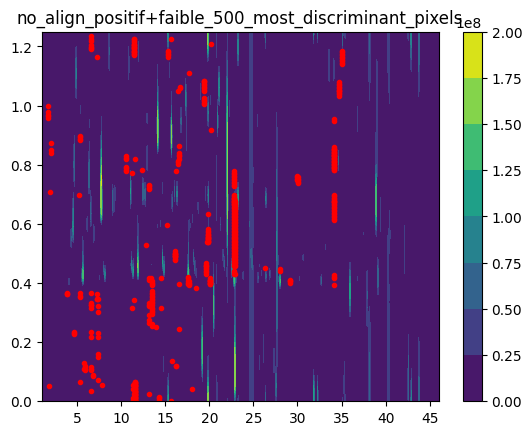

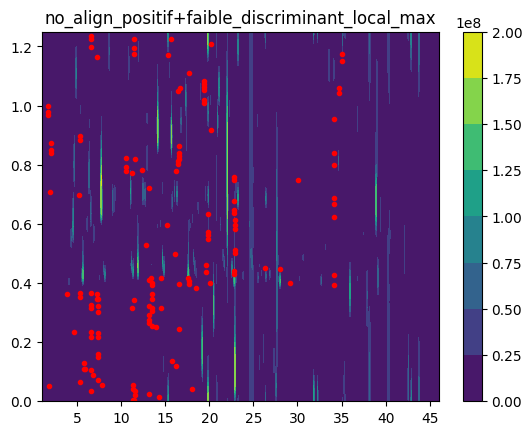

c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �-Octyl acrolein: [-31].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string (+)-�3-Carene: [-21].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string Pinene, �: [-32].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable 

nb peaks:
145


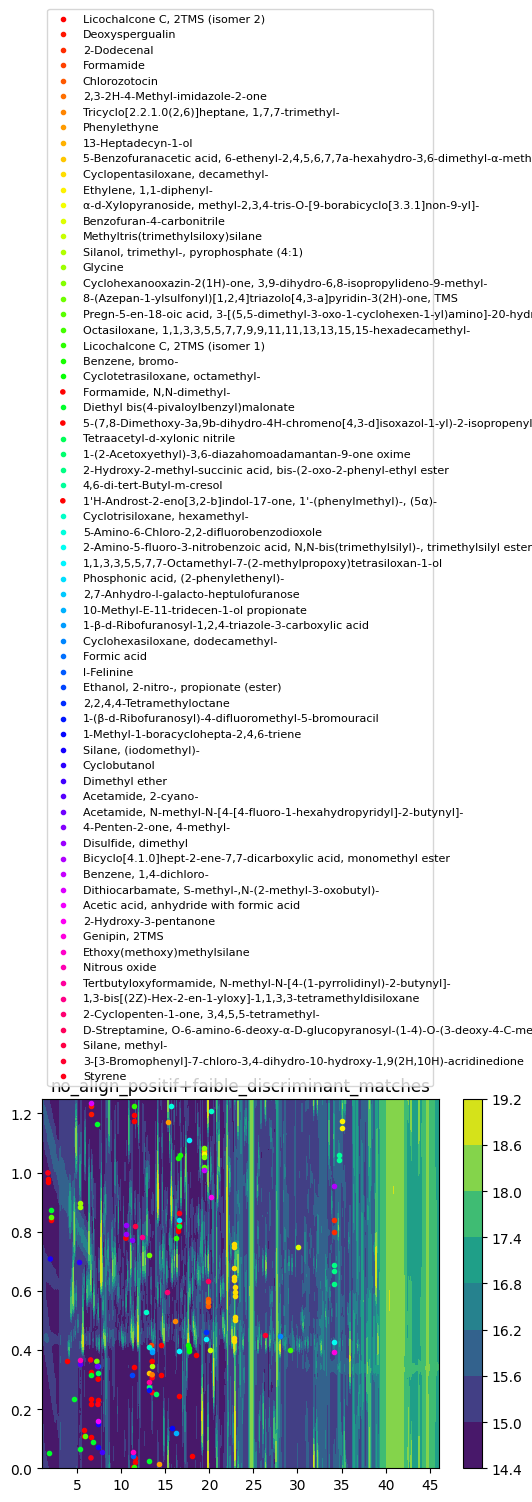

In [22]:
matches_pos_plus_pos_f = discriminant_pixel.find_discriminant_compounds(chromato_ref_obj, chromatos, chromato_cube, vij_posi_plus_posi_f_vs_other, disp=True, max_pixel=500, local_max_filter=True, mod_time=1.25, title="no_align_positif+faible_")

In [23]:
for match in matches_pos_plus_pos_f[:20]:
    print(match[1]["compound_name"])

Licochalcone C, 2TMS (isomer 2)
Licochalcone C, 2TMS (isomer 2)
Deoxyspergualin
2-Dodecenal
Formamide
Chlorozotocin
2,3-2H-4-Methyl-imidazole-2-one
Tricyclo[2.2.1.0(2,6)]heptane, 1,7,7-trimethyl-
Phenylethyne
Licochalcone C, 2TMS (isomer 2)
13-Heptadecyn-1-ol
5-Benzofuranacetic acid, 6-ethenyl-2,4,5,6,7,7a-hexahydro-3,6-dimethyl-α-methylene-2-oxo-, methyl ester
Cyclopentasiloxane, decamethyl-
Cyclopentasiloxane, decamethyl-
Ethylene, 1,1-diphenyl-
α-d-Xylopyranoside, methyl-2,3,4-tris-O-[9-borabicyclo[3.3.1]non-9-yl]-
Benzofuran-4-carbonitrile
Licochalcone C, 2TMS (isomer 2)
Cyclopentasiloxane, decamethyl-
Methyltris(trimethylsiloxy)silane


# Resume

In [24]:
for match in matches[:20]:
    print(match[1]["compound_name"])

Dicarbadodecaborane-c,c'-bis(propanenitrile)-
Benzeneacetic acid, 4-(1H-1,2,3,4-tetrazol-1-yl)-
1'H-Androst-2-eno[3,2-b]indol-17-one, 1'-(phenylmethyl)-, (5α)-
1,5-Diazabicyclo[3.1.0]hexane
Dicarbadodecaborane-c,c'-bis(propanenitrile)-
Licochalcone C, 2TMS (isomer 2)
Silane, diethyldi(pentafluorobenzyloxy)-
2-(1H-Indol-3-yl)-N-((1-methyl-1H-pyrrol-2-yl)methyl)ethanamine, N,N'-bis-methyl
1,1,3,3,5,5-Hexamethyl-1,5-bis(2-methylpropoxy)trisiloxane
Propanoic acid, butyl ester
Methyl N-(N-benzyloxycarbonyl-beta-l-aspartyl)-beta-d-glucosaminide
Diethyl bis(4-pivaloylbenzyl)malonate
Pregn-5-en-18-oic acid, 3-[(5,5-dimethyl-3-oxo-1-cyclohexen-1-yl)amino]-20-hydroxy-, γ-lactone, (3α,20R)-
Heptano[a]purin-2,6-dione, 1,3-dimethyl-
p-tert.-Butylcatechol
4-Methoxymethoxy-1,4-diphenylbut-2-yn-1-ol
Disiloxane, 1,1,3,3-tetramethyl-1,3-bis(pentafluorophenyl)-
1,1,3,3,5,5,7,7-Octamethyl-7-(2-methylpropoxy)tetrasiloxan-1-ol
4-Trimethylsilylmethylbenzamide
N,N'-Bis(Carbobenzyloxy)-lysine methyl(ester)


In [25]:
for match in matches_pos_plus_pos_f[:20]:
    print(match[1]["compound_name"])

Licochalcone C, 2TMS (isomer 2)
Licochalcone C, 2TMS (isomer 2)
Deoxyspergualin
2-Dodecenal
Formamide
Chlorozotocin
2,3-2H-4-Methyl-imidazole-2-one
Tricyclo[2.2.1.0(2,6)]heptane, 1,7,7-trimethyl-
Phenylethyne
Licochalcone C, 2TMS (isomer 2)
13-Heptadecyn-1-ol
5-Benzofuranacetic acid, 6-ethenyl-2,4,5,6,7,7a-hexahydro-3,6-dimethyl-α-methylene-2-oxo-, methyl ester
Cyclopentasiloxane, decamethyl-
Cyclopentasiloxane, decamethyl-
Ethylene, 1,1-diphenyl-
α-d-Xylopyranoside, methyl-2,3,4-tris-O-[9-borabicyclo[3.3.1]non-9-yl]-
Benzofuran-4-carbonitrile
Licochalcone C, 2TMS (isomer 2)
Cyclopentasiloxane, decamethyl-
Methyltris(trimethylsiloxy)silane
